In [ ]:
#pip install mediapipe

In [ ]:
 # Importing Libraries
import cv2
import mediapipe as mp
import pandas as pd
import os
import imutils
import numpy as np
import warnings
from IPython.display import display, Javascript
from google.colab.patches import cv2_imshow
from google.colab.output import eval_js
from base64 import b64decode
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Feature Extraction
tab_features = []
tab_label = []
directory = '/content/drive/MyDrive/Dataset'
for folder in os.listdir(directory):
    f = os.path.join(directory, folder)
    for file in os.listdir(f):
        drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
        with mp_face_mesh.FaceMesh(static_image_mode=True, min_detection_confidence=0.5) as face_mesh:
            image = cv2.imread(os.path.join(f, file))
            results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if results.multi_face_landmarks:
            x, y, z, label = [], [], [], []
            for multi_face_landmarks in results.multi_face_landmarks:
                for i in range(468):                                            # Having anchor point as Cupid's Bow
                    x.append(
                        multi_face_landmarks.landmark[i].x - multi_face_landmarks.landmark[0].x)
                    y.append(
                        multi_face_landmarks.landmark[i].y - multi_face_landmarks.landmark[0].y)
                    z.append(
                        multi_face_landmarks.landmark[i].z - multi_face_landmarks.landmark[0].z)
                col = x + y + z
                tab_features.append(col)
                tab_label.append(folder)

In [ ]:
# Dataset Making
df_features = pd.DataFrame(tab_features)
df_label = pd.DataFrame(tab_label)

In [ ]:
# Printing the Dataset
print(df_features)

    0         1         2         3         4         5         6     \
0    0.0 -0.022177  0.005710 -0.004131 -0.022977 -0.013737  0.018369   
1    0.0 -0.015420  0.003457 -0.005219 -0.015958 -0.009269  0.013632   
2    0.0 -0.018896 -0.009930 -0.036172 -0.023599 -0.027526 -0.034506   
3    0.0 -0.021064 -0.010898 -0.040426 -0.026569 -0.031212 -0.039803   
4    0.0 -0.006739 -0.004762 -0.022522 -0.008644 -0.011179 -0.017186   
5    0.0 -0.001841 -0.001787 -0.013996 -0.002509 -0.003723 -0.006796   
6    0.0 -0.006692 -0.003193 -0.018376 -0.008431 -0.010199 -0.014960   
7    0.0  0.006859 -0.005732 -0.012797  0.006475  0.000447 -0.018269   
8    0.0 -0.012463  0.001973 -0.006395 -0.012994 -0.008382  0.007119   
9    0.0 -0.001229 -0.000764 -0.009193 -0.001496 -0.001900 -0.002669   
10   0.0 -0.001414 -0.000822 -0.010098 -0.001786 -0.002156 -0.002820   
11   0.0 -0.001284 -0.000790 -0.010282 -0.001532 -0.001831 -0.002342   
12   0.0  0.003193  0.001812 -0.002179  0.004244  0.005430  0.00

In [ ]:
# Printing the Labels
print(df_label)

           0
0    aravind
1    aravind
2    aravind
3    aravind
4    aravind
5    aravind
6     sarath
7     sarath
8     sarath
9     sarath
10    sarath
11    sarath
12     rohit
13     rohit
14     rohit
15     rohit
16      Ramu
17      Ramu
18      Ramu
19      Ramu
20      Ramu
21      Ramu
22     surya
23     surya
24     surya
25     surya
26     surya
27     shrey
28     shrey
29     shrey
30     shrey
31     shrey
32    jhagan
33    jhagan
34    jhagan
35    jhagan
36    jhagan
37  ayyappan
38  ayyappan
39  ayyappan
40  ayyappan
41  ayyappan
42     arora
43     arora
44     arora
45     arora
46     arora
47   thamizh
48   thamizh
49   thamizh
50   thamizh
51   thamizh


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_label = label_encoder.fit_transform(df_label)

In [ ]:
print(df_label)

[1 1 1 1 1 1 6 6 6 6 6 6 5 5 5 5 0 0 0 0 0 0 8 8 8 8 8 7 7 7 7 7 4 4 4 4 4
 3 3 3 3 3 2 2 2 2 2 9 9 9 9 9]


In [ ]:
df_model=df_features
df_model[1404]=df_label

In [ ]:
df_model.head()

,0,1,2,3,4,5,6,7,8,9,...,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404
0,0.0,-0.022177,0.005710,-0.004131,-0.022977,-0.013737,0.018369,0.025498,0.026846,0.025870,...,-0.020963,-0.015315,-0.014983,-0.007965,-0.013772,-0.008927,-0.008823,-0.056639,-0.062023,1
1,0.0,-0.015420,0.003457,-0.005219,-0.015958,-0.009269,0.013632,-0.000749,0.020185,0.019270,...,-0.022040,-0.010359,-0.018650,-0.009586,-0.002406,-0.000708,-0.002837,-0.031907,-0.035717,1
2,0.0,-0.018896,-0.009930,-0.036172,-0.023599,-0.027526,-0.034506,-0.086818,-0.042622,-0.048365,...,-0.013965,0.005457,-0.016050,-0.004830,0.034473,0.029919,0.023859,0.030671,0.030355,1
3,0.0,-0.021064,-0.010898,-0.040426,-0.026569,-0.031212,-0.039803,-0.093027,-0.049043,-0.055732,...,-0.017626,0.003226,-0.019182,-0.006930,0.028734,0.024382,0.018215,0.022356,0.021472,1
4,0.0,-0.006739,-0.004762,-0.022522,-0.008644,-0.011179,-0.017186,-0.099200,-0.021333,-0.023488,...,-0.016098,0.010075,-0.020251,-0.006382,0.039666,0.032565,0.024346,0.047477,0.047791,1


In [ ]:
# from google.colab import files


In [ ]:
# df_model.to_csv('df_csv.csv', encoding = 'utf-8') 
# files.download('df_csv.csv')

In [ ]:
df_m = df_model.drop([df_model.columns[0], df_model.columns[468], df_model.columns[936]], axis=1)

In [ ]:
df_m.head()

,1,2,3,4,5,6,7,8,9,10,...,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404
0,-0.022177,0.005710,-0.004131,-0.022977,-0.013737,0.018369,0.025498,0.026846,0.025870,0.042607,...,-0.020963,-0.015315,-0.014983,-0.007965,-0.013772,-0.008927,-0.008823,-0.056639,-0.062023,1
1,-0.015420,0.003457,-0.005219,-0.015958,-0.009269,0.013632,-0.000749,0.020185,0.019270,0.029782,...,-0.022040,-0.010359,-0.018650,-0.009586,-0.002406,-0.000708,-0.002837,-0.031907,-0.035717,1
2,-0.018896,-0.009930,-0.036172,-0.023599,-0.027526,-0.034506,-0.086818,-0.042622,-0.048365,-0.064519,...,-0.013965,0.005457,-0.016050,-0.004830,0.034473,0.029919,0.023859,0.030671,0.030355,1
3,-0.021064,-0.010898,-0.040426,-0.026569,-0.031212,-0.039803,-0.093027,-0.049043,-0.055732,-0.076548,...,-0.017626,0.003226,-0.019182,-0.006930,0.028734,0.024382,0.018215,0.022356,0.021472,1
4,-0.006739,-0.004762,-0.022522,-0.008644,-0.011179,-0.017186,-0.099200,-0.021333,-0.023488,-0.031807,...,-0.016098,0.010075,-0.020251,-0.006382,0.039666,0.032565,0.024346,0.047477,0.047791,1


In [ ]:
def dataset_cleaner(df):
    # getting the percentage of null values in each column
    null_per_column = pd.DataFrame(
        df.isnull().sum()/len(df), columns=['Percentage of null values'])
    # removing the column if the percentage of null values is more than 60%
    df = df.drop(
        null_per_column[null_per_column['Percentage of null values'] > 0.60].index, axis=1)
    # checking for the count of unique values in each column
    for column in df.columns:
        if(len(df[column].unique()) <= 10):
            # removing NULL values and performing label encoding
            df[column].fillna(value='NULL', inplace=True)
            label_encoder = preprocessing.LabelEncoder()
            df[column] = label_encoder.fit_transform(df[column])
        # removing the column if the count is more than 10 and the column is non-numeric
        elif(len(df[column].unique()) > 10 and not np.issubdtype(df[column].dtype, np.number)):
            df.drop(column, axis=1, inplace=True)
        # replacing the NULL values with the median of that column if the count is more than 10 and column is numeric
        elif(len(df[column].unique()) > 10 and np.issubdtype(df[column].dtype, np.number)):
            df[column].fillna(df[column].median(), inplace=True)
    # Cleaning the Entire Dataset Using the applymap Function
    df = df.applymap(lambda x: x.strip() if type(x) == str else x)
    return df

In [ ]:
def feature_extractor(dataframe):
    # Dataset Cleaning
    dataframe = dataset_cleaner(dataframe)
    
    # Stop checking for co-relation in any 2 columns if no. of columns <= 60.
    for i in range(len(dataframe.columns)-1):
      if dataframe.shape[1] > 60:
        for j in range(i+1, len(dataframe.columns)-1):
          if abs(dataframe.iloc[:, i].corr(dataframe.iloc[:, j])) >= 0.9:
            dataframe = dataframe.drop(columns=dataframe.columns[j])
            break
      else:
        break

    # Stop checking whether any 2 rows have the same contents if no. of columns <= 40.
    if dataframe.shape[1] > 40:
        dataframe.drop_duplicates(keep='first', inplace=True)

    # Stop Checking whether more than 85 percent of the values of a column are unique if no. of columns <= 20.
    for i in dataframe.columns:
      if dataframe.shape[1] > 20:
        if dataframe[i].nunique()/dataframe.shape[0]*100 > 85:
          dataframe.drop(i, inplace=True, axis=1)
      else:
        break
    
    return dataframe

In [ ]:
df_ext= feature_extractor(df_m)

In [ ]:
df_ext

,1369,1371,1373,1375,1376,1377,1380,1382,1384,1386,1388,1390,1391,1393,1395,1398,1399,1401,1403,1404
0,-0.063512,-0.059148,-0.019359,-0.024045,-0.026419,-0.020468,-0.061075,-0.064703,-0.060155,-0.042182,-0.019869,-0.057734,-0.020973,-0.023185,-0.020963,-0.007965,-0.013772,-0.008823,-0.062023,1
1,-0.022582,-0.011206,-0.013774,-0.019966,-0.027817,-0.011121,-0.038932,-0.033598,-0.032336,-0.022478,-0.007478,0.001436,-0.015941,-0.025209,-0.022040,-0.009586,-0.002406,-0.002837,-0.035717,1
2,0.047819,0.067916,0.009716,-0.003128,-0.018192,0.026629,0.021335,0.038116,0.031188,0.025884,0.028860,0.109814,0.001609,-0.018508,-0.013965,-0.004830,0.034473,0.023859,0.030355,1
3,0.045622,0.067264,0.004903,-0.006495,-0.022859,0.019077,0.011096,0.029546,0.023667,0.019321,0.023254,0.105548,-0.001245,-0.022518,-0.017626,-0.006930,0.028734,0.018215,0.021472,1
4,0.083126,0.111318,0.011806,0.000300,-0.021366,0.028715,0.033113,0.059978,0.050768,0.038222,0.035106,0.158499,0.006101,-0.021846,-0.016098,-0.006382,0.039666,0.024346,0.047791,1
5,0.080887,0.106793,0.016487,0.002926,-0.016941,0.036975,0.042169,0.066444,0.056350,0.043656,0.040579,0.158303,0.008300,-0.018035,-0.012700,-0.004406,0.045922,0.030591,0.055045,1
6,0.037455,0.059801,-0.034302,-0.024050,-0.041687,-0.052995,-0.055071,-0.030567,-0.026428,-0.029194,-0.031840,0.044142,-0.018919,-0.038628,-0.034297,-0.022123,-0.036436,-0.041189,-0.040070,6
7,0.105466,0.123199,0.035374,0.022967,0.008541,0.059735,0.086010,0.106144,0.093185,0.072275,0.058386,0.175535,0.025360,0.004762,0.007775,0.005983,0.061275,0.044519,0.096206,6
8,-0.015951,-0.011930,0.016221,0.000045,-0.001787,0.037222,0.017164,0.014054,0.009018,0.014411,0.027668,0.027049,0.001856,-0.002325,-0.000452,0.005012,0.036936,0.034556,0.014875,6
9,0.059662,0.078010,0.018114,0.005899,-0.007984,0.036316,0.039187,0.055723,0.047567,0.038293,0.036852,0.120936,0.009659,-0.009235,-0.005349,0.000257,0.041953,0.030164,0.048206,6


In [ ]:
len(df_features.columns)

1404

In [ ]:
df_features=df_features.drop([1404], axis=1)


In [ ]:

target = df_label
features = df_features
print(len(df_features.columns))
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.15, random_state=10)

1404


In [ ]:
rf = LogisticRegression()
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
print(classification_report(rf_pred, Y_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0

    accuracy                           0.50         8
   macro avg       0.50      0.35      0.40         8
weighted avg       0.88      0.50      0.60         8



In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
original_image = take_photo()

<IPython.core.display.Javascript object>

In [ ]:
img = cv2.imread(original_image)

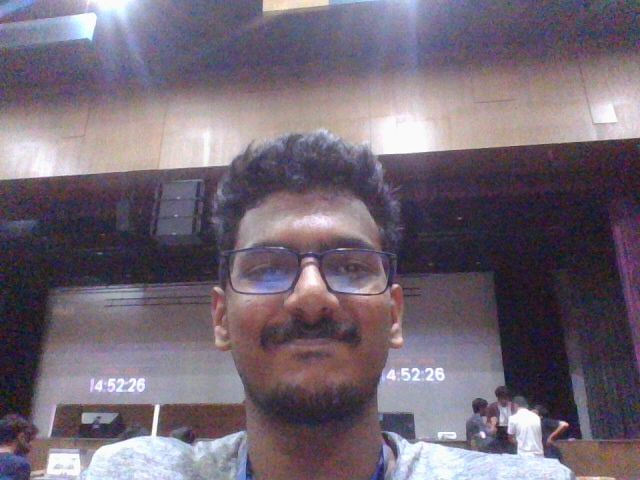

In [ ]:
cv2_imshow(img)

In [ ]:
test_tab_features = []
with mp_face_mesh.FaceMesh(static_image_mode=True, min_detection_confidence=0.5) as face_mesh:
  test_results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  if test_results.multi_face_landmarks:
            x, y, z = [], [], []
            for multi_face_landmarks in results.multi_face_landmarks:
                for i in range(468):
                    x.append(
                        multi_face_landmarks.landmark[i].x - multi_face_landmarks.landmark[0].x)
                    y.append(
                        multi_face_landmarks.landmark[i].y - multi_face_landmarks.landmark[0].y)
                    z.append(
                        multi_face_landmarks.landmark[i].z - multi_face_landmarks.landmark[0].z)
                col = x + y + z
                test_tab_features.append(col)

In [ ]:
len(test_tab_features[0])

1404

In [ ]:
rf_pred = rf.predict(test_tab_features)

In [ ]:
tested_person = label_encoder.inverse_transform(rf_pred)

In [ ]:
print(tested_person)

['sarath']
